In [1]:
import os

QM9_path = os.environ["DATA"] + "/00_datasets/DFT/QM9/QM9.smi"
 

In [2]:
import csv
from rdkit.Chem import MolFromSmiles
from evomol.molgraphops.molgraph import MolGraph
from tqdm import tqdm

def load_dataset_smiles(path):
    smi_list = []
    
    with open(path, "r") as f:
        reader = csv.reader(f)

        for i, row in enumerate(tqdm(list(reader))):
                smi_list.append(MolGraph(MolFromSmiles(row[0])).to_aromatic_smiles())

    return smi_list

In [3]:
smi_list = load_dataset_smiles(QM9_path)

100%|██████████| 133885/133885 [00:30<00:00, 4364.24it/s]


In [4]:
print("# molecules : " + str(len(smi_list)))

# molecules : 133885


In [5]:
from rdkit.Chem.Lipinski import HeavyAtomCount

def get_mol_sizes(smi_list):
    mol_sizes = []
    for smi in tqdm(smi_list):
        mol_sizes.append(HeavyAtomCount(MolFromSmiles(smi)))
    return mol_sizes

In [6]:
mol_sizes = get_mol_sizes(smi_list)

100%|██████████| 133885/133885 [00:04<00:00, 29009.18it/s]


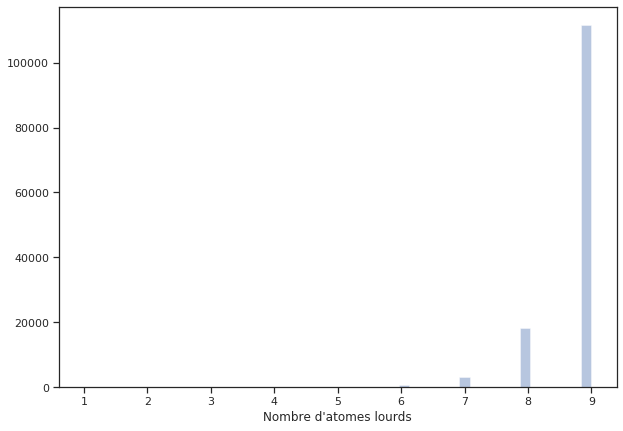

In [8]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.xlabel("Nombre d'atomes lourds")
sns.distplot(mol_sizes, kde=False)
# plt.plot([27], [0])
plt.show()

In [9]:
import numpy as np
np.mean(mol_sizes)

8.79583971318669

In [10]:
np.median(mol_sizes)

9.0

In [11]:
np.max(mol_sizes)

9

In [12]:
np.min(mol_sizes)

1

In [13]:
from rdkit.Chem.Descriptors import NumRadicalElectrons
from rdkit.Chem import MolFromSmiles
from evomol.molgraphops.molgraph import MolGraph

def is_radical(smi):
    return NumRadicalElectrons(MolFromSmiles(smi)) > 0

def contains_charge(smi):
    """
    Checking if the given molecule contains charges
    """
    
    mol = MolFromSmiles(smi)
    for at in mol.GetAtoms():
        if at.GetFormalCharge() != 0:
            return True
    
    return False

def is_CNOF(smi):
    
    valid_atom_types = ["C", "O", "N", "F", "H"]
    
    molgraph = MolGraph(MolFromSmiles(smi))
    
    # Extracting atom types:
    atom_types = set(molgraph.get_atom_types())
    
    # Checking that all atom types are valid
    for at_type in atom_types:
        if at_type not in valid_atom_types:
            return False
        
    return True


In [14]:
def perform_counts(smiles_list):
    
    n_mol_radicals = 0
    n_mol_contain_charges = 0
    n_mol_CNOF = 0
    n_mol_total = 0
    
    atom_types_count = {}
    
    for smi in tqdm(smiles_list):
        
        n_mol_total += 1
        
        if is_radical(smi):
            n_mol_radicals += 1
            
        if contains_charge(smi):
            n_mol_contain_charges += 1
        
        if is_CNOF(smi):
            n_mol_CNOF += 1t
                
        molgraph = MolGraph(MolFromSmiles(smi))
        atom_types = set(molgraph.get_atom_types())
            
        for atom_type in atom_types:
            if atom_type in atom_types_count:
                atom_types_count[atom_type] += 1
            else:
                atom_types_count[atom_type] = 1
                
    return n_mol_radicals, n_mol_contain_charges, n_mol_CNOF, n_mol_total, atom_types_count

In [15]:
n_mol_radicals, n_mol_contain_charges, n_mol_CNOF, n_mol_total, atom_types_count = perform_counts(smi_list)

100%|██████████| 133885/133885 [01:22<00:00, 1613.83it/s]


In [16]:
n_mol_radicals

0

In [17]:
n_mol_contain_charges

1845

In [18]:
n_mol_CNOF

133885

In [19]:
n_mol_total

133885

In [20]:
atom_types_count

{'C': 133882, 'N': 82859, 'O': 113938, 'F': 2163}